In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
# Mean center both X and Y
# X = genotype data (114 rows and 1260 columns)
# Y = expression data (1260 rows and 1 column, column 395)

X = np.loadtxt("SNPs.txt")
Y = np.loadtxt("expression.txt", usecols=(394))

X_centered = X - X.mean()
Y_centered = Y - Y.mean()


128


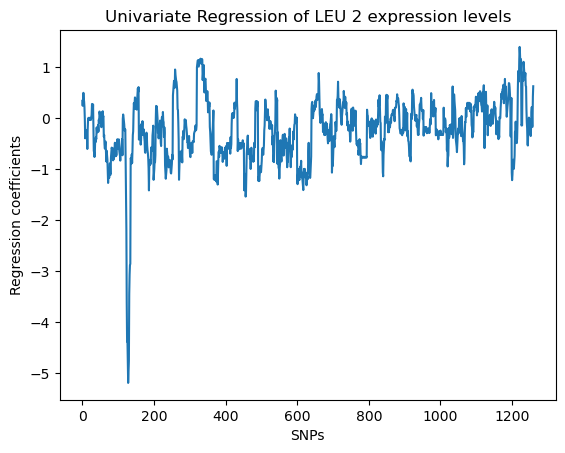

<Figure size 600x1200 with 0 Axes>

In [3]:
# Univariate Regression
# 5a
beta = []
for col in range(X.shape[1]):
    a = np.matmul((X_centered[:, col]).transpose(),(X_centered[:, col]))
    b = np.matmul(X_centered[:, col].transpose(), Y_centered)*(1/a)
    beta.append(b)

plt.plot(beta)
plt.xlabel("SNPs")
plt.ylabel("Regression coefficients")
plt.title("Univariate Regression of LEU 2 expression levels")
plt.figure(figsize=(6,12))
print(np.argmin(beta))

128


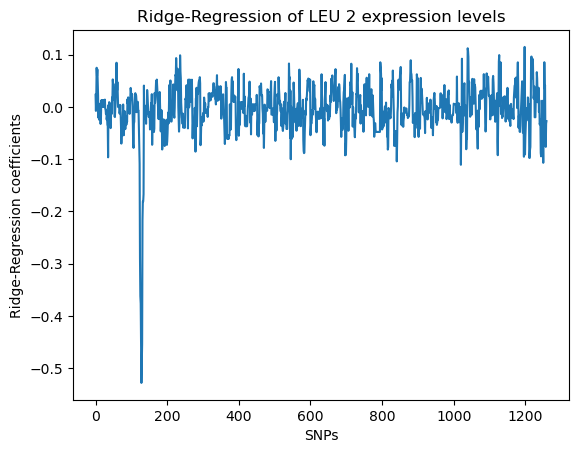

<Figure size 2000x1200 with 0 Axes>

In [4]:
# Ridge regression
# 5c. sigma_0^2 = 5.0


a = np.matmul(X_centered.transpose(),X_centered) # X_transpose x X 
sigma = 1.0/5.0
b = np.linalg.inv(a + np.dot(sigma , np.identity(1260))) # X_transpose times X + sigma times I
c = np.matmul(X_centered.transpose(),Y_centered) # X_transpose times Y
result = np.matmul(b,c)

plt.plot(result)
plt.xlabel("SNPs")
plt.ylabel("Ridge-Regression coefficients")
plt.title("Ridge-Regression of LEU 2 expression levels")
plt.figure(figsize=(20,12))
print(np.argmin(result))

128


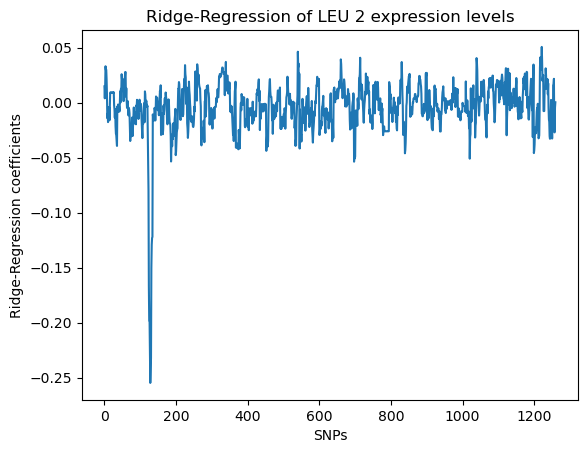

<Figure size 2000x1200 with 0 Axes>

In [77]:
# Ridge regression
# 5c. sigma_0^2 = 0.005

a = np.matmul(X_centered.transpose(),X_centered) # X_transpose x X 
sigma = 1.0/0.005
b = np.linalg.inv(a + np.dot(sigma , np.identity(1260))) # X_transpose times X + sigma times I
c = np.matmul(X_centered.transpose(),Y_centered) # X_transpose times Y
result = np.matmul(b,c)

plt.plot(result)
plt.xlabel("SNPs")
plt.ylabel("Ridge-Regression coefficients")
plt.title("Ridge-Regression of LEU 2 expression levels")
plt.figure(figsize=(20,12))
print(np.argmin(result))

Q. Explain the different effects of the two prior distributions above on the re-
gression parameter estimates. Which SNP has the strongest influence on the LEU 2
expression?

Smaller $\Sigma_0^2$ means a stronger prior belief. It leads to a larger lambda which 
causes a stronger pull of the estimates towards 0. SNP 128 has the strongest influence
on the LEU2 expression. 
